In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('/workspaces/DJS-compute-tasks/Task 3/Data/student dropout.csv')

In [5]:
df.head()

,School,Gender,Age,Address,Family_Size,Parental_Status,Mother_Education,Father_Education,Mother_Job,Father_Job,...,Free_Time,Going_Out,Weekend_Alcohol_Consumption,Weekday_Alcohol_Consumption,Health_Status,Number_of_Absences,Grade_1,Grade_2,Final_Grade,Dropped_Out
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,4,0,11,11,False
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,2,9,11,11,False
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,2,2,3,3,6,12,13,12,False
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,2,1,1,5,0,14,14,14,False
4,GP,F,16,U,GT3,T,3,3,other,other,...,3,2,1,2,5,0,11,13,13,False


In [7]:
df.dtypes

School                         object
Gender                         object
Age                             int64
Address                        object
Family_Size                    object
Parental_Status                object
Mother_Education                int64
Father_Education                int64
Mother_Job                     object
Father_Job                     object
Reason_for_Choosing_School     object
Guardian                       object
Travel_Time                     int64
Study_Time                      int64
Number_of_Failures              int64
School_Support                 object
Family_Support                 object
Extra_Paid_Class               object
Extra_Curricular_Activities    object
Attended_Nursery               object
Wants_Higher_Education         object
Internet_Access                object
In_Relationship                object
Family_Relationship             int64
Free_Time                       int64
Going_Out                       int64
Weekend_Alco

In [16]:
df.isnull().sum()

School                         0
Gender                         0
Age                            0
Address                        0
Family_Size                    0
Parental_Status                0
Mother_Education               0
Father_Education               0
Mother_Job                     0
Father_Job                     0
Reason_for_Choosing_School     0
Guardian                       0
Travel_Time                    0
Study_Time                     0
Number_of_Failures             0
School_Support                 0
Family_Support                 0
Extra_Paid_Class               0
Extra_Curricular_Activities    0
Attended_Nursery               0
Wants_Higher_Education         0
Internet_Access                0
In_Relationship                0
Family_Relationship            0
Free_Time                      0
Going_Out                      0
Weekend_Alcohol_Consumption    0
Weekday_Alcohol_Consumption    0
Health_Status                  0
Number_of_Absences             0
Grade_1   

In [17]:
df.columns

Index(['School', 'Gender', 'Age', 'Address', 'Family_Size', 'Parental_Status',
       'Mother_Education', 'Father_Education', 'Mother_Job', 'Father_Job',
       'Reason_for_Choosing_School', 'Guardian', 'Travel_Time', 'Study_Time',
       'Number_of_Failures', 'School_Support', 'Family_Support',
       'Extra_Paid_Class', 'Extra_Curricular_Activities', 'Attended_Nursery',
       'Wants_Higher_Education', 'Internet_Access', 'In_Relationship',
       'Family_Relationship', 'Free_Time', 'Going_Out',
       'Weekend_Alcohol_Consumption', 'Weekday_Alcohol_Consumption',
       'Health_Status', 'Number_of_Absences', 'Grade_1', 'Grade_2',
       'Final_Grade', 'Dropped_Out'],
      dtype='object')

**Lets inspect all the non-numeric values**

In [18]:
non_numeric = ['School', 'Gender','Address', 'Family_Size','Parental_Status', 'Mother_Job', 'Father_Job','Reason_for_Choosing_School', 'Guardian',
               'School_Support', 'Family_Support',
       'Extra_Paid_Class', 'Extra_Curricular_Activities', 'Attended_Nursery',
       'Wants_Higher_Education', 'Internet_Access', 'In_Relationship']

In [19]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

In [23]:
df_encoded = df.copy()
df_encoded[non_numeric] = df_encoded[non_numeric].apply(lambda col: labelencoder.fit_transform(col))


In [25]:
df_encoded.head()

,School,Gender,Age,Address,Family_Size,Parental_Status,Mother_Education,Father_Education,Mother_Job,Father_Job,...,Free_Time,Going_Out,Weekend_Alcohol_Consumption,Weekday_Alcohol_Consumption,Health_Status,Number_of_Absences,Grade_1,Grade_2,Final_Grade,Dropped_Out
0,0,0,18,1,0,0,4,4,0,4,...,3,4,1,1,3,4,0,11,11,False
1,0,0,17,1,0,1,1,1,0,2,...,3,3,1,1,3,2,9,11,11,False
2,0,0,15,1,1,1,1,1,0,2,...,3,2,2,3,3,6,12,13,12,False
3,0,0,15,1,0,1,4,2,1,3,...,2,2,1,1,5,0,14,14,14,False
4,0,0,16,1,0,1,3,3,2,2,...,3,2,1,2,5,0,11,13,13,False


In [31]:
X = df_encoded.drop(columns=['Dropped_Out'])
y = df_encoded['Dropped_Out']

In [32]:
df_encoded.head()

,School,Gender,Age,Address,Family_Size,Parental_Status,Mother_Education,Father_Education,Mother_Job,Father_Job,...,Free_Time,Going_Out,Weekend_Alcohol_Consumption,Weekday_Alcohol_Consumption,Health_Status,Number_of_Absences,Grade_1,Grade_2,Final_Grade,Dropped_Out
0,0,0,18,1,0,0,4,4,0,4,...,3,4,1,1,3,4,0,11,11,False
1,0,0,17,1,0,1,1,1,0,2,...,3,3,1,1,3,2,9,11,11,False
2,0,0,15,1,1,1,1,1,0,2,...,3,2,2,3,3,6,12,13,12,False
3,0,0,15,1,0,1,4,2,1,3,...,2,2,1,1,5,0,14,14,14,False
4,0,0,16,1,0,1,3,3,2,2,...,3,2,1,2,5,0,11,13,13,False


In [33]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
clf = SVC()

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=32)


In [35]:
clf.fit(X_train, y_train)

SVC()

In [37]:
y_pred = clf.predict(X_test)

In [39]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Precision
precision = precision_score(y_test, y_pred, average='weighted')  # Use 'weighted' for multi-class problems
print(f'Precision: {precision}')

# Recall
recall = recall_score(y_test, y_pred, average='weighted')
print(f'Recall: {recall}')

# F1 Score
f1 = f1_score(y_test, y_pred, average='weighted')
print(f'F1 Score: {f1}')

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(f'Confusion Matrix:\n{cm}')

# Classification Report
report = classification_report(y_test, y_pred)
print(f'Classification Report:\n{report}')


Accuracy: 0.9384615384615385
Precision: 0.9392615047787461
Recall: 0.9384615384615385
F1 Score: 0.9334547109695038
Confusion Matrix:
[[163   1]
 [ 11  20]]
Classification Report:
              precision    recall  f1-score   support

       False       0.94      0.99      0.96       164
        True       0.95      0.65      0.77        31

    accuracy                           0.94       195
   macro avg       0.94      0.82      0.87       195
weighted avg       0.94      0.94      0.93       195



<Axes: >

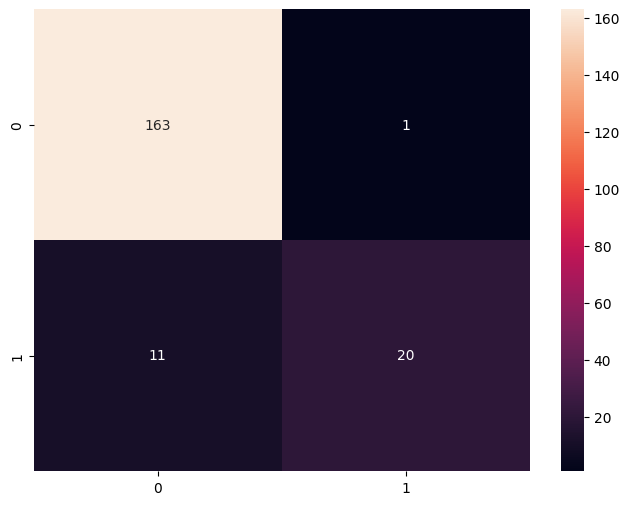

In [42]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d',)